In [15]:
from thesis.config import *
from thesis.thesis_utils import load_p
from core.id_detection.feature_manager import FeatureManager
from utils.video_manager import get_auto_video_manager
import matplotlib.pyplot as plt
from utils.drawing.points import draw_points_crop
from utils.img import get_safe_selection
import cv2
from core.id_detection.features import get_idtracker_features
from core.region.clustering import draw_region
import matplotlib.gridspec as gridspec
from PyQt4 import QtGui
from utils.drawing.points import draw_points
import cPickle as pickle
import numpy as np
import matplotlib.patches as mpatches

In [3]:
with open(DEV_WD+'/thesis/results/clustering_k.pkl') as f:
    results = pickle.load(f)

[5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200]


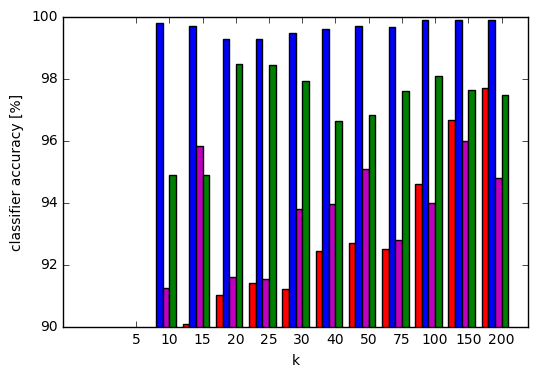

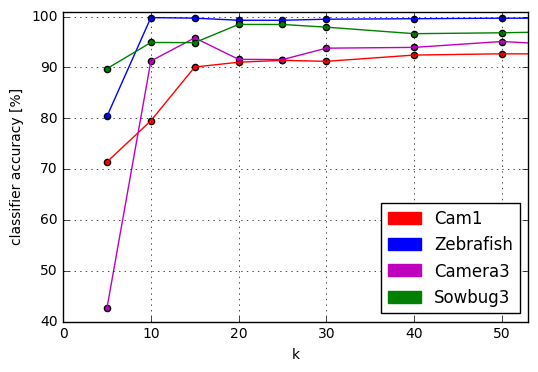

In [48]:
Ns = results['Ns']
print Ns

plt.figure()
ax = plt.subplot(111)
c_pers = {}
colors = ['r', 'g', 'b', 'm']
x = np.array(range(len(Ns)))
pos = [-0.3, -0.1, 0.1, 0.3]

width = 0.2
patches = []
min_ = 100
for i, pname in enumerate(project_paths.keys()):
    cs, ms = results[pname]
    c_percentages = [100*c/float(c+m) for c, m in zip(cs, ms)]
    
    min_ = min(min_, min(c_percentages))
    c_pers[pname] = c_percentages
    
    plt.bar(x+pos[i], c_percentages, width=width, color=project_colors[pname], align='center')
    patches.append(mpatches.Patch(color=project_colors[pname], label=pname))
ax.set_xticks(x + width)
ax.set_xticklabels(Ns)

ax.set_ylim([min_-5, 100])
plt.legend(handles=patches, loc=4)
plt.ylabel('classifier accuracy [%]')
plt.xlabel('k')
# plt.show()

plt.savefig(OUT_IMGS_WD+'/region_classifier_k_dependency.png', bbox_inches='tight', dpi=256)

ax.set_ylim([90, 100])
ax.legend_.remove()
plt.savefig(OUT_IMGS_WD+'/region_classifier_k_dependency_zoom.png', bbox_inches='tight', dpi=256)

plt.figure()
ax = plt.subplot(111)
for pname in project_paths.keys():
    plt.plot(Ns, c_pers[pname], color=project_colors[pname])
    plt.scatter(Ns, c_pers[pname], c=project_colors[pname])
    plt.hold(True)


ax.set_ylim([40, 101])
ax.set_xlim([0, 203])
plt.legend(handles=patches, loc=4)
plt.ylabel('classifier accuracy [%]')
plt.xlabel('k')
plt.grid(True)

plt.savefig(OUT_IMGS_WD+'/region_classifier_k_dependency_plot.png', bbox_inches='tight', dpi=256)

ax.set_ylim([40, 101])
ax.set_xlim([0, 53])

plt.savefig(OUT_IMGS_WD+'/region_classifier_k_dependency_plot_zoom.png', bbox_inches='tight', dpi=256)
plt.show()